In [14]:
import pandas as pd

X_test = pd.read_csv('test_data_numerical.csv')
X_train = pd.read_csv('train_data_numerical.csv')

Y_test = pd.read_csv('test_target.csv')
Y_train = pd.read_csv('train_target.csv')

Author: Vijval Rajan

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib

# Assuming X_train, Y_train, X_test, Y_test are already loaded and preprocessed

# Initialize the Random Forest Classifier
rf_model1 = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model1.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = rf_model1.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))

# Print feature importances
feature_importance = sorted(zip(rf_model1.feature_importances_, X_train.columns), reverse=True)
print("\nTop 10 Most Important Features:")
for importance, feature in feature_importance[:10]:
    print(f"{feature}: {importance:.4f}")

# Save the model
joblib.dump(rf_model1, 'random_forest_model.joblib')
print("\nModel saved as 'random_forest_model.joblib'")

# To load the model later:
# loaded_model = joblib.load('random_forest_model.joblib')

/Users/vij/Desktop/traffic/env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


KeyboardInterrupt: 

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Print shapes of input data
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)

# X_train is already a NumPy array, but Y_train is a DataFrame
X = X_train
y = Y_train.values.ravel()  # Convert DataFrame to NumPy array and flatten

print("X shape:", X.shape)
print("y shape:", y.shape)

# Check for mismatch in number of samples
if X.shape[0] != y.shape[0]:
    print("Warning: Mismatch in number of samples between X and y")
    min_samples = min(X.shape[0], y.shape[0])
    X = X[:min_samples]
    y = y[:min_samples]
    print("Adjusted X shape:", X.shape)
    print("Adjusted y shape:", y.shape)

# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
print("Unique encoded labels:", np.unique(y_encoded))

# Convert to one-hot encoding
num_classes = len(label_encoder.classes_)
y_onehot = to_categorical(y_encoded, num_classes=num_classes)
print("y_onehot shape:", y_onehot.shape)
print("Number of classes:", num_classes)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

# X_train is already 3D, so we don't need to reshape it
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_train dtype:", X_train.dtype)
print("y_train dtype:", y_train.dtype)

# Define model architecture
model = Sequential([
    SimpleRNN(64, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu', return_sequences=False),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')
])
model.summary()

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with reduced epochs
epochs = 10
try:
    history = model.fit(
        X_train, y_train,
        validation_split=0.2,
        epochs=epochs,
        batch_size=32,
        callbacks=[early_stopping],
        verbose=1
    )

    # Evaluate the model
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print(f"Test loss: {test_loss:.4f}")
    print(f"Test accuracy: {test_accuracy:.4f}")

    # Make predictions
    predictions = model.predict(X_test)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(y_test, axis=1)

    # If you need to convert back to original labels
    predicted_labels = label_encoder.inverse_transform(predicted_classes)

    # Print training history
    print("\nTraining History:")
    for epoch, (loss, val_loss, accuracy, val_accuracy) in enumerate(zip(
        history.history['loss'],
        history.history['val_loss'],
        history.history['accuracy'],
        history.history['val_accuracy']
    ), 1):
        print(f"Epoch {epoch}/{epochs}")
        print(f" loss: {loss:.4f} - val_loss: {val_loss:.4f} - accuracy: {accuracy:.4f} - val_accuracy: {val_accuracy:.4f}")

except Exception as e:
    print(f"An error occurred: {str(e)}")
    import traceback
    traceback.print_exc()

X_train shape: (2906336, 8)
Y_train shape: (5676439, 1)
X shape: (2906336, 8)
y shape: (5676439,)
Adjusted X shape: (2906336, 8)
Adjusted y shape: (2906336,)
Unique encoded labels: [0 1 2 3]
y_onehot shape: (2906336, 4)
Number of classes: 4
X_train shape: (2325068, 8)
y_train shape: (2325068, 4)


AttributeError: 'DataFrame' object has no attribute 'dtype'

In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

NameError: name 'model' is not defined

In [ ]:
import matplotlib.pyplot as plt

def plot_and_save_training_history(history, save_path='training_history.png'):
    # Extract history data
    epochs = range(1, len(history['loss']) + 1)
    train_loss = history['loss']
    val_loss = history['val_loss']
    train_acc = history['accuracy']
    val_acc = history['val_accuracy']

    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

    # Plot training & validation loss values
    ax1.plot(epochs, train_loss, 'bo-', label='Training loss')
    ax1.plot(epochs, val_loss, 'ro-', label='Validation loss')
    ax1.set_title('Model loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()

    # Plot training & validation accuracy values
    ax2.plot(epochs, train_acc, 'bo-', label='Training accuracy')
    ax2.plot(epochs, val_acc, 'ro-', label='Validation accuracy')
    ax2.set_title('Model accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()

    plt.tight_layout()
    
    # Save the figure
    plt.savefig(save_path)
    print(f"Training history plot saved to {save_path}")
    
    # Close the figure to free up memory
    plt.close(fig)

# Assuming you have the history dictionary from your model training
# If you don't have it, you can create it manually from the output you provided
history = {
    'loss': [0.6094, 0.6063, 0.6061, 0.6060, 0.6060],
    'val_loss': [0.6066, 0.6064, 0.6065, 0.6065, 0.6065],
    'accuracy': [0.8043, 0.8044, 0.8044, 0.8044, 0.8044],
    'val_accuracy': [0.8044, 0.8044, 0.8044, 0.8044, 0.8044]
}

# Call the function to plot and save the training history
plot_and_save_training_history(history)

Training history plot saved to training_history.png


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Make predictions on the test set
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)  # Convert probabilities to class indices
true_classes = np.argmax(y_test, axis=1)  # Convert one-hot encoded labels to class indices

# Compute the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix using a heatmap for better visualization
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


NameError: name 'true_classes' is not defined

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Assuming X_train and Y_train are already defined
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)

# X_train is already a NumPy array, but Y_train is a DataFrame
X = X_train
y = Y_train.values.ravel()  # Convert DataFrame to NumPy array and flatten

print("X shape:", X.shape)
print("y shape:", y.shape)

# Check for mismatch in number of samples
if X.shape[0] != y.shape[0]:
    print("Warning: Mismatch in number of samples between X and y")
    min_samples = min(X.shape[0], y.shape[0])
    X = X[:min_samples]
    y = y[:min_samples]
    print("Adjusted X shape:", X.shape)
    print("Adjusted y shape:", y.shape)

# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
print("Unique encoded labels:", np.unique(y_encoded))

# Convert to one-hot encoding
num_classes = len(label_encoder.classes_)
y_onehot = to_categorical(y_encoded, num_classes=num_classes)
print("y_onehot shape:", y_onehot.shape)
print("Number of classes:", num_classes)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

# X_train is already 3D, so we don't need to reshape it
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_train dtype:", X_train.dtype)
print("y_train dtype:", y_train.dtype)

# Define a more complex model architecture
model = Sequential([
    SimpleRNN(128, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu', return_sequences=True),
    Dropout(0.2),
    SimpleRNN(64, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')
])
model.summary()

# Compile the model with a higher initial learning rate
model.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

# Train the model
epochs = 20
try:
    history = model.fit(
        X_train, y_train,
        validation_split=0.2,
        epochs=epochs,
        batch_size=32,
        callbacks=[early_stopping, reduce_lr],
        verbose=1
    )

    # Evaluate the model
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print(f"Test loss: {test_loss:.4f}")
    print(f"Test accuracy: {test_accuracy:.4f}")

    # Make predictions
    predictions = model.predict(X_test)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(y_test, axis=1)

    # If you need to convert back to original labels
    predicted_labels = label_encoder.inverse_transform(predicted_classes)

    # Print training history
    print("\nTraining History:")
    for epoch, (loss, val_loss, accuracy, val_accuracy) in enumerate(zip(
        history.history['loss'],
        history.history['val_loss'],
        history.history['accuracy'],
        history.history['val_accuracy']
    ), 1):
        print(f"Epoch {epoch}/{epochs}")
        print(f" loss: {loss:.4f} - val_loss: {val_loss:.4f} - accuracy: {accuracy:.4f} - val_accuracy: {val_accuracy:.4f}")

except Exception as e:
    print(f"An error occurred: {str(e)}")
    import traceback
    traceback.print_exc()

X_train shape: (487600, 1, 8)
Y_train shape: (5676439, 1)
X shape: (487600, 1, 8)
y shape: (5676439,)
Adjusted X shape: (487600, 1, 8)
Adjusted y shape: (487600,)
Unique encoded labels: [0 1 2 3]
y_onehot shape: (487600, 4)
Number of classes: 4
X_train shape: (390080, 1, 8)
y_train shape: (390080, 4)
X_train dtype: float64
y_train dtype: float64


/Users/vij/Desktop/traffic/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_17 (SimpleRNN)       │ (None, 1, 128)         │        17,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_18 (SimpleRNN)       │ (None, 64)             │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,260 (141.64 KB)

 Trainable params: 36,260 (141.64 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
9752/9752 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.8028 - loss: 0.6581 - val_accuracy: 0.8075 - val_loss: 0.6017 - learning_rate: 0.0100
Epoch 2/20
9752/9752 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.8034 - loss: 0.6100 - val_accuracy: 0.8075 - val_loss: 0.6011 - learning_rate: 0.0100
Epoch 3/20
9752/9752 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.8040 - loss: 0.6082 - val_accuracy: 0.8075 - val_loss: 0.6012 - learning_rate: 0.0100
Epoch 4/20
9752/9752 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.8039 - loss: 0.6092 - val_accuracy: 0.8075 - val_loss: 0.6011 - learning_rate: 0.0100
Epoch 5/20
9752/9752 ━━━━━━━━━━━━━━━━━━━━ 10s 977us/step - accuracy: 0.8043 - loss: 0.6103 - val_accuracy: 0.8075 - val_loss: 0.6010 - learning_rate: 0.0100
Epoch 6/20
6967/9752 ━━━━━━━━━━━━━━━━━━━━ 2s 854us/step - accuracy: 0.8045 - loss: 0.6087

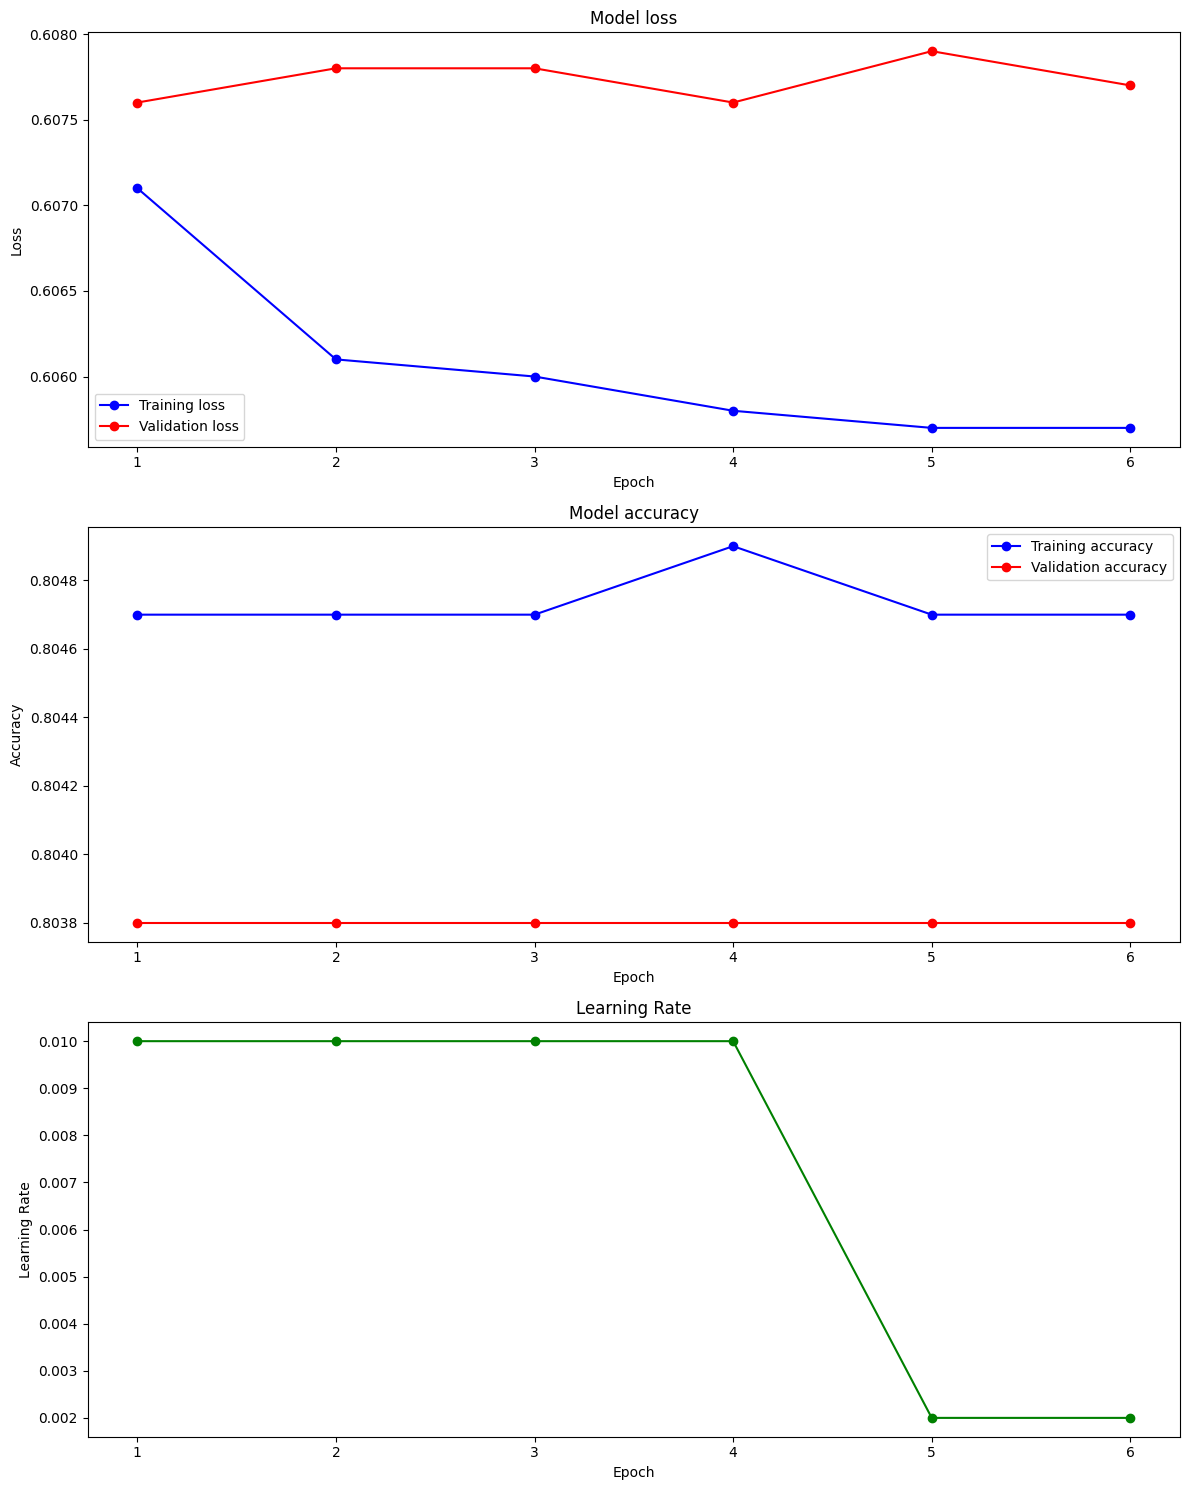

In [ ]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    # Extract history data
    epochs = range(1, len(history['loss']) + 1)
    train_loss = history['loss']
    val_loss = history['val_loss']
    train_acc = history['accuracy']
    val_acc = history['val_accuracy']
    learning_rates = history['learning_rate']

    # Create a figure with three subplots
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 15))

    # Plot training & validation loss values
    ax1.plot(epochs, train_loss, 'bo-', label='Training loss')
    ax1.plot(epochs, val_loss, 'ro-', label='Validation loss')
    ax1.set_title('Model loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()

    # Plot training & validation accuracy values
    ax2.plot(epochs, train_acc, 'bo-', label='Training accuracy')
    ax2.plot(epochs, val_acc, 'ro-', label='Validation accuracy')
    ax2.set_title('Model accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()

    # Plot learning rate
    ax3.plot(epochs, learning_rates, 'go-')
    ax3.set_title('Learning Rate')
    ax3.set_xlabel('Epoch')
    ax3.set_ylabel('Learning Rate')

    plt.tight_layout()
    plt.show()

# Create the history dictionary from the provided output
history = {
    'loss': [0.6071, 0.6061, 0.6060, 0.6058, 0.6057, 0.6057],
    'val_loss': [0.6076, 0.6078, 0.6078, 0.6076, 0.6079, 0.6077],
    'accuracy': [0.8047, 0.8047, 0.8047, 0.8049, 0.8047, 0.8047],
    'val_accuracy': [0.8038, 0.8038, 0.8038, 0.8038, 0.8038, 0.8038],
    'learning_rate': [0.01, 0.01, 0.01, 0.01, 0.002, 0.002]
}

# Call the function to plot the training history
plot_training_history(history)

In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

4762/4762 ━━━━━━━━━━━━━━━━━━━━ 2s 359us/step - accuracy: 0.8021 - loss: 0.6100
Test loss: 0.6074
Test accuracy: 0.8037


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix using a heatmap for better visualization
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()